# Rotina básica de treino e teste para modelos de classificação

Este notebook foi produzido como objeto de estudo da rotina básica de Classificação utilizando algoritimos svm do sklearn

 * Importação dos dados;
 * Tratamento dos dados;
 * Definição de features(x) e labels (y);
 * Definição de dados de teste (test) e de treino (train);
 * Treino;
 * Previsão;
 * Avaliação.

## Compra baseada na navegação do site (Linear)

Neste primeiro exemplo, o modelo treinado tem o objetivo de dizer se um usuário comprará ou não algo no site com base na sua navegação no site.

O conjunto de dados contem 3 featires associadas ao acesso às páginas "home", "how_it_works" e "contact", sendo que 1 representa acesso e 0 que não houve acesso. Uma quarta coluna ("bought")  será a nossa classificação, com 1 = comprou e 0 = não comprou.

### Importando dados

In [1]:
import pandas as pd

uri='https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'

dataset = pd.read_csv(uri)

dataset.head()


,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


### Tratando dados

Traduzir colunas para o português

In [2]:
dataset.rename(columns=
               {"home": "inicial",
                "how_it_works": "como_funciona",
                "contact": "contato",
                "bought": "comprou"}, inplace = True)

dataset.head()

,inicial,como_funciona,contato,comprou
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


### Definindo features (x) e labels (y)

In [3]:
x = dataset[["inicial", "como_funciona", "contato"]] #Multidimensional
y = dataset["comprou"] #Unidimensional

### Defininco conjuntos de treino (train) e teste (test)

In [4]:
amostras = dataset.shape[0]
amostras_treino = round(amostras * 0.75)

print(f'O dataset possui {amostras} amostras. Vamos utilizar {amostras_treino} para treino e {amostras - amostras_treino} para teste')

O dataset possui 99 amostras. Vamos utilizar 74 para treino e 25 para teste


In [5]:
train_split = amostras_treino

train_x = x[:train_split]
train_y = y[:train_split]

test_x = x[train_split:]
test_y = y[train_split:]

print(f'Train: {len(train_x)}', f'Test: {len(test_x)}')

Train: 74 Test: 25


### Treinando o Modelo

In [6]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(train_x, train_y)

LinearSVC()

### Fazendo previsoes

In [7]:
model_precicted_y = model.predict(test_x)

### Avaliando modelo

Usando acurácia (taxa de acerto) como métrica

In [8]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_y, model_precicted_y)

print(f'O modelo tem uma acurácioa de {accuracy * 100}%')

O modelo tem uma acurácioa de 96.0%


## Projetos finalizados com base no preço e estimativa de horas gastas (Não linear)

O dataset possui duas features "price" e "expected_hours". E uma última coluna ("unfinished") que indica se o projeto não foi (1) ou foi (0) finalizado

### Obtendo dados

In [9]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'

dataset2 = pd.read_csv(uri)

dataset2.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


### Tratando dados

Traduzir colunas para o português, transformar a coluna unfinished para finished

In [10]:
dataset2.rename(columns={
    "unfinished": "nao_finalizado",
    "expected_hours": "horas_esperadas",
    "price": "preco"
}, inplace=True)

dataset2.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [11]:
#criando coluna finalizado
dataset2["finalizado"] = dataset2.nao_finalizado.map({
    0 : 1,
    1 : 0
})

dataset2

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
...,...,...,...,...
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1


### Visualizando os dados

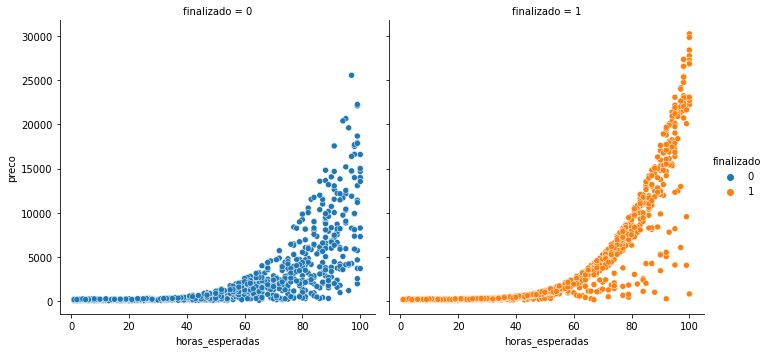

In [12]:
import seaborn as sns

preco_hora_plot = sns.relplot(x = "horas_esperadas", y = "preco", hue = "finalizado", col = "finalizado", data = dataset2)

Parrece que finalizar ou não um projeto, tem uma relação forte entre a quantidade de horas esperada e o valor pago

### Definindo features (x) e labels (y)

In [13]:
x2 = dataset2[["horas_esperadas", "preco"]]
y2 = dataset2["finalizado"]

### Definindo conjuntos de treino (train) e teste (test)

Utilizando o split do sklearn

In [14]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler #pada reescalar os valores
from sklearn.model_selection import train_test_split
import numpy as np

seed = 20

np.random.seed(seed) #geração pseudo aleatória para manter a replicabilidade do modelo [para todos os atributos 'random_state]

raw_train_x2, raw_test_x2, train_y2, test_y2 = train_test_split(x2, y2, #conjuntos de features e labels
                                                    test_size = 0.25, #tamanho do conjunto de teste
                                                    stratify = y2) #manter a proporção das amostras com base nos valores de 'y'

scaler = StandardScaler()
scaler.fit(raw_train_x2)
train_x2 = scaler.transform(raw_train_x2) #reescala o conjunto x de treinos criados
test_x2 = scaler.transform(raw_test_x2) #reescala o conjunto x de teste

print(f"Temos {len(train_x2)} amostras de treino e {len(test_x2)} de teste")

Temos 1617 amostras de treino e 540 de teste


### Treinando o Modelo

In [15]:
model2 = SVC()
model2.fit(train_x2, train_y2)

SVC()

### Fazendo previsões

In [16]:
model_precicted_y2 = model2.predict(test_x2)

### Avaliando o modelo

In [17]:
accuracy2 = accuracy_score(test_y2, model_precicted_y2)
print(f"A taxa de acerto do nosso modelo é de {round(accuracy2 * 100, 2)}%")

A taxa de acerto do nosso modelo é de 70.37%


É importante ter um modelo de referência para saber se a acurácia do modelo treinado é de fato boa ou ruim

In [18]:
import numpy as np

baseline = np.ones(test_y2.shape[0]) #Baseline para avaliar a qualidade do modelo

In [19]:
baseline_acuracy2 = accuracy_score(test_y2, baseline)

print(f"A taxa de acerto do baseline é {round(baseline_acuracy2 * 100, 2)}%")

A taxa de acerto do baseline é 52.59%


## Anuncios de Carros

O conjunto de dados possui 3 features: modelo do carro, milhas por ano e preço do anúncio. E uma etiqueta de sim ou não para a venda

In [20]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'

dataset3 = pd.read_csv(uri)

In [21]:
dataset3

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes


In [22]:
#Renomeando colunas
dataset3 = dataset3.rename(columns=
                {"mileage_per_year": "milhas_por_ano",
                 "model_year": "ano_do_modelo",
                 "price": "preco",
                 "sold": "vendido"})

dataset3.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [23]:
#Trocando valores
dataset3.vendido = dataset3.vendido.map(
    {"no": 0,
     "yes": 1}
)

dataset3.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [24]:
#criando nova coluna
from datetime import datetime

ano_atual = datetime.today().year

dataset3['idade_do_modelo'] = ano_atual - dataset3.ano_do_modelo 

dataset3.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,21
1,1,7843,1998,40557.96,1,23
2,2,7109,2006,89627.50,0,15
3,3,26823,2015,95276.14,0,6
4,4,7935,2014,117384.68,1,7


In [25]:
#Convertendo coluna em milhas para km
milhas_para_km = 1.60934

dataset3['km_por_ano'] = dataset3.milhas_por_ano * milhas_para_km

dataset3.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,21,35085.22134
1,1,7843,1998,40557.96,1,23,12622.05362
2,2,7109,2006,89627.50,0,15,11440.79806
3,3,26823,2015,95276.14,0,6,43167.32682
4,4,7935,2014,117384.68,1,7,12770.11290


In [26]:
#Removendo colunas que não serão utilizadas
dataset3 = dataset3.drop(columns= ['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis=1)

dataset3.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,21,35085.22134
1,40557.96,1,23,12622.05362
2,89627.50,0,15,11440.79806
3,95276.14,0,6,43167.32682
4,117384.68,1,7,12770.11290


In [27]:
#Definindo x e y
x3 = dataset3[['preco', 'idade_do_modelo', 'km_por_ano']]
y3 = dataset3['vendido']

In [28]:
#Conjuntos de treino e teste
seed = 20

np.random.seed(seed) #geração pseudo aleatória para manter a replicabilidade do modelo [para todos os atributos 'random_state]

raw_train_x3, raw_test_x3, train_y3, test_y3 = train_test_split(x3, y3, #conjuntos de features e labels
                                                    test_size = 0.25, #tamanho do conjunto de teste
                                                    stratify = y3) #manter a proporção das amostras com base nos valores de 'y'

In [29]:
#baseline
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='stratified')
dummy.fit(raw_train_x3, train_y3)
acuracia_dummy = dummy.score(raw_test_x3, test_y3) * 100

print(f'A accurácia do baseline (Dummy Stratified) é {acuracia_dummy}%')

A accurácia do baseline (Dummy Stratified) é 50.32%


In [30]:
#SVC não linear

#Reescalando conjuntos
scaler = StandardScaler()
scaler.fit(raw_train_x3)
train_x3 = scaler.transform(raw_train_x3) #reescala o conjunto x de treinos criados
test_x3 = scaler.transform(raw_test_x3) #reescala o conjunto x de teste

print(f"Temos {len(train_x3)} amostras de treino e {len(test_x3)} de teste")

#Treino
model3_1 = SVC()
model3_1.fit(train_x3, train_y3)

#Previsões
model_precicted_y3_1 = model3_1.predict(test_x3)

#Avaliando
accuracy3_1 = accuracy_score(test_y3, model_precicted_y3_1)
print(f"A taxa de acerto do nosso modelo é de {round(accuracy3_1 * 100, 2)}%")

Temos 7500 amostras de treino e 2500 de teste
A taxa de acerto do nosso modelo é de 75.92%


Comparando o resultado do modelo SVC() com o Baseline há um ganho de aprox. 25%